In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [2]:
#Logistic Regression Model
def Logistic_Regression_Classifier(X_train, y_train, X_test):
  log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
  log_reg.fit(X_train, y_train)
  y_pred = log_reg.predict(X_test)
  return y_pred

In [3]:
#Decision Tree Model
def Decision_Tree_Classifier(X_train, y_train, X_test):
  dtree = DecisionTreeClassifier()
  dtree.fit(X_train, y_train)
  y_pred = dtree.predict(X_test)
  return y_pred

In [4]:
#Random Forest Model
def Random_Forest_Classifier(X_train, y_train, X_test):
  rf = RandomForestClassifier()
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  return y_pred

In [5]:
df_train_original = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Employee_Promotion/train.csv")
df_train_original

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [6]:
df_test_original = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Employee_Promotion/test.csv")
df_test_original

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [7]:
df_train = df_train_original.drop(["employee_id"], axis=1)
df_test = df_test_original.drop(["employee_id"], axis=1)

In [8]:
df_train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


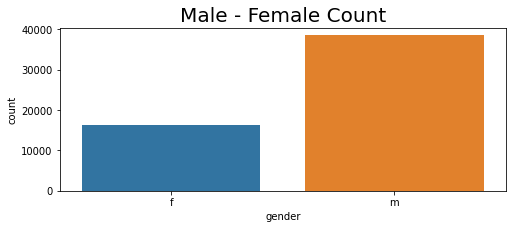

In [9]:
plt.figure(figsize=(8,3))
plt.title('Male - Female Count', fontsize = 20)
sns.countplot(df_train["gender"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


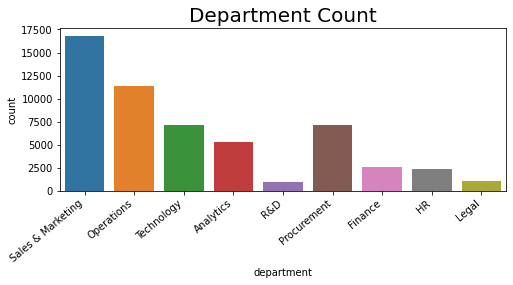

In [10]:
plt.figure(figsize=(8,3))
plt.title('Department Count', fontsize = 20)
ax = sns.countplot(df_train["department"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


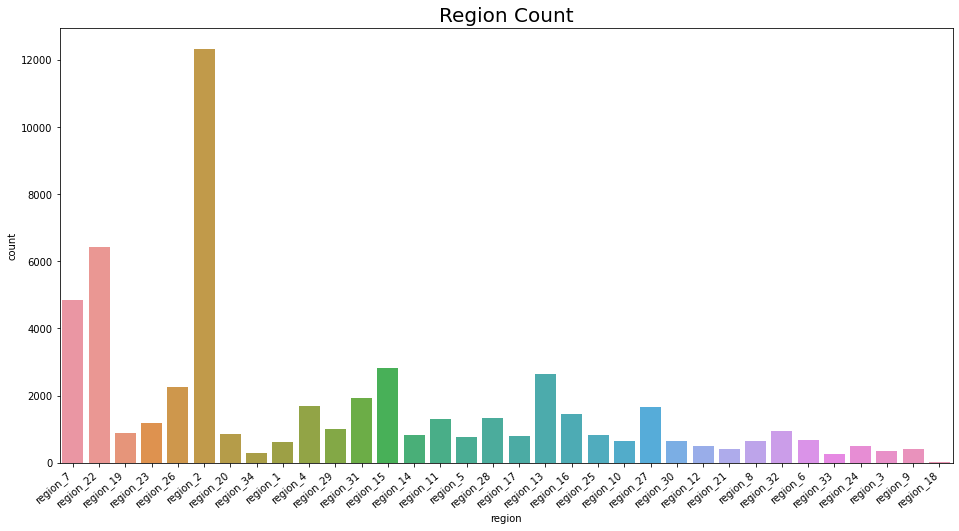

In [11]:
plt.figure(figsize=(16,8))
plt.title('Region Count', fontsize = 20)
ax = sns.countplot(df_train["region"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


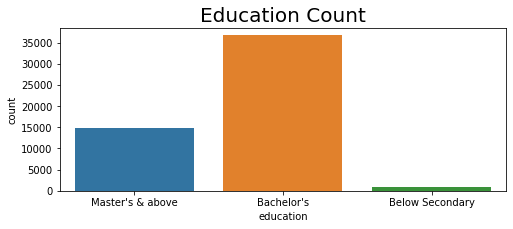

In [12]:
plt.figure(figsize=(8,3))
plt.title('Education Count', fontsize = 20)
sns.countplot(df_train["education"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


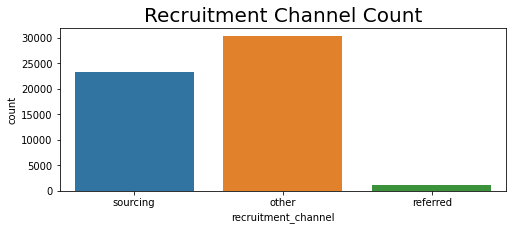

In [13]:
plt.figure(figsize=(8,3))
plt.title('Recruitment Channel Count', fontsize = 20)
sns.countplot(df_train["recruitment_channel"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


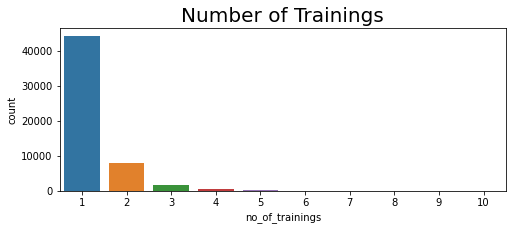

In [14]:
plt.figure(figsize=(8,3))
plt.title('Number of Trainings', fontsize = 20)
sns.countplot(df_train["no_of_trainings"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


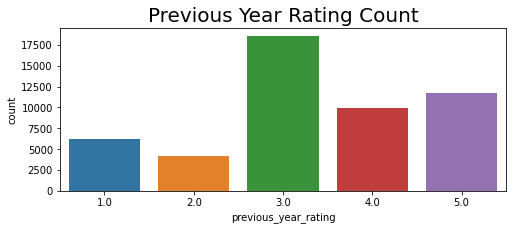

In [15]:
plt.figure(figsize=(8,3))
plt.title('Previous Year Rating Count', fontsize = 20)
sns.countplot(df_train["previous_year_rating"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


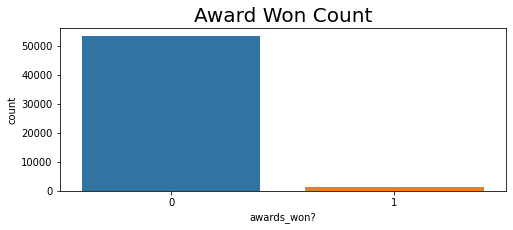

In [16]:
plt.figure(figsize=(8,3))
plt.title('Award Won Count', fontsize = 20)
sns.countplot(df_train["awards_won?"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


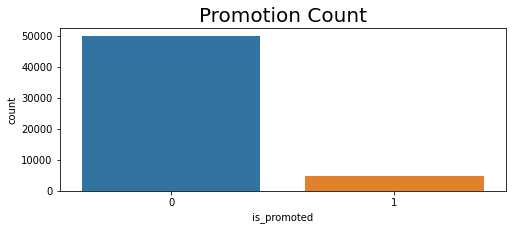

In [17]:
plt.figure(figsize=(8,3))
plt.title('Promotion Count', fontsize = 20)
sns.countplot(df_train["is_promoted"])
plt.show()

In [18]:
le = LabelEncoder()
df_train["department"] = le.fit_transform(df_train["department"])
df_train["region"] = le.fit_transform(df_train["region"])
df_train["education"] = le.fit_transform(df_train["education"])
df_train["gender"] = le.fit_transform(df_train["gender"])
df_train["recruitment_channel"] = le.fit_transform(df_train["recruitment_channel"])
df_train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,8,18,0,1,0,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,8,5,0,1,2,1,48,3.0,17,0,0,78,0
54804,4,19,2,0,0,1,37,2.0,6,0,0,56,0
54805,0,0,0,1,0,1,27,5.0,3,1,0,79,0
54806,7,33,3,1,2,1,29,1.0,2,0,0,45,0


In [19]:
le = LabelEncoder()
df_test["department"] = le.fit_transform(df_test["department"])
df_test["region"] = le.fit_transform(df_test["region"])
df_test["education"] = le.fit_transform(df_test["education"])
df_test["gender"] = le.fit_transform(df_test["gender"])
df_test["recruitment_channel"] = le.fit_transform(df_test["recruitment_channel"])
df_test

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8,18,0,1,2,1,24,NaN,1,1,0,77
1,2,28,0,0,0,1,31,3.0,5,0,0,51
2,7,4,0,1,0,1,31,1.0,4,0,0,47
3,5,11,0,0,0,3,31,2.0,9,0,0,65
4,1,21,0,1,2,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,3,11,1,1,2,1,24,3.0,1,0,0,61
23486,8,17,0,1,2,1,31,3.0,7,0,0,74
23487,2,7,0,0,2,1,26,4.0,4,0,0,50
23488,5,24,0,1,2,3,27,NaN,1,0,0,70


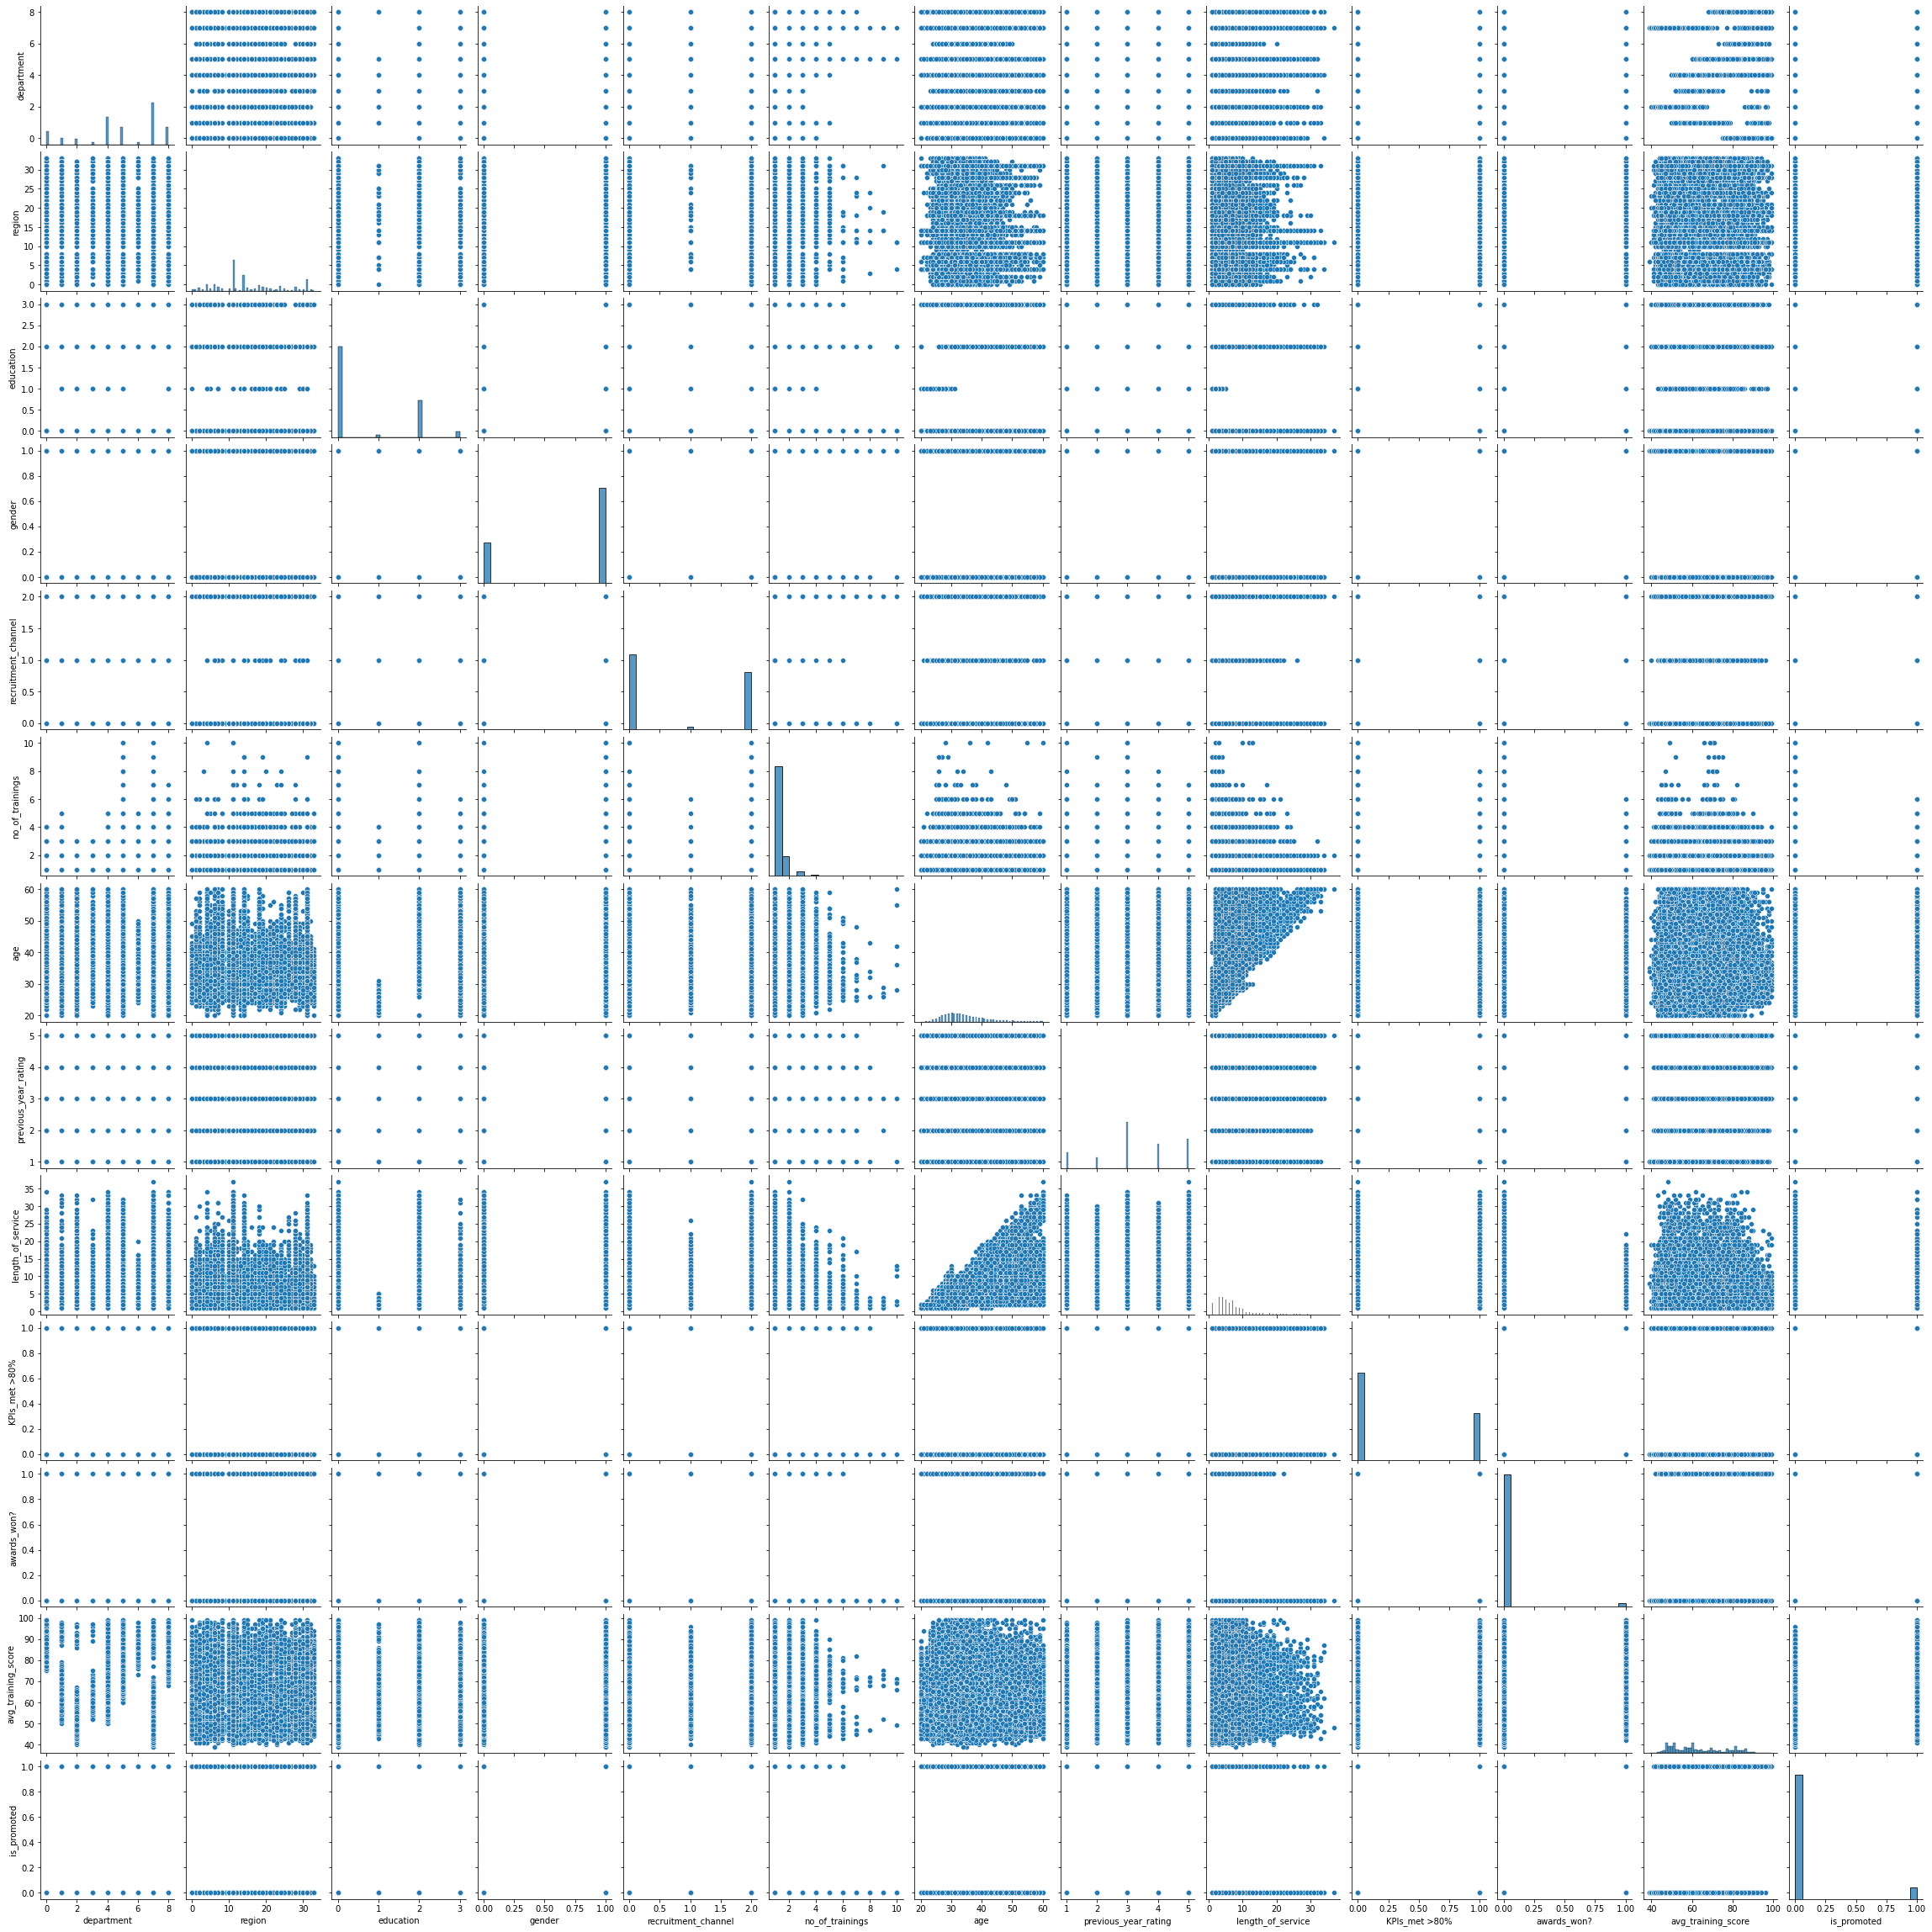

In [ ]:
sns.pairplot(df_train)

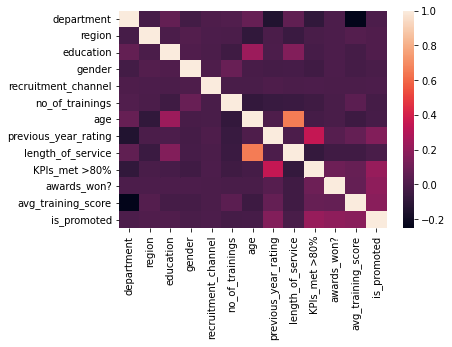

In [ ]:
correlation = df_train.corr()
sns.heatmap(correlation)

In [20]:
df_train.isnull().sum()

department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [21]:
df_test.isnull().sum()

department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [22]:
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)

In [23]:
X = df_train.iloc[:,0:12]
y = df_train.iloc[:,12]
X_t = df_test.iloc[:,0:12]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4)

In [25]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [26]:
y_pred_Logistic_Regression = Logistic_Regression_Classifier(X_train, y_train, X_test)

In [27]:
a_1 = accuracy_score(y_test, y_pred_Logistic_Regression)
a_1

0.9201483914127593

In [28]:
a_2 = confusion_matrix(y_test, y_pred_Logistic_Regression)
a_2

array([[15031,    57],
       [ 1256,    99]])

In [29]:
a_3 = recall_score(y_test, y_pred_Logistic_Regression)
a_3

0.07306273062730627

In [30]:
a_4 = precision_score(y_test, y_pred_Logistic_Regression)
a_4

0.6346153846153846

In [31]:
a_5 = f1_score(y_test, y_pred_Logistic_Regression)
a_5

0.13103904698874916

In [32]:
y_pred_Decision_Tree = Decision_Tree_Classifier(X_train, y_train, X_test)

In [33]:
b_1 = accuracy_score(y_test, y_pred_Decision_Tree)
b_1

0.8945447910965152

In [34]:
b_2 = confusion_matrix(y_test, y_pred_Decision_Tree)
b_2

array([[14104,   984],
       [  750,   605]])

In [35]:
b_3 = recall_score(y_test, y_pred_Decision_Tree)
b_3

0.44649446494464945

In [36]:
b_4 = precision_score(y_test, y_pred_Decision_Tree)
b_4

0.38074260541220895

In [37]:
b_5 = f1_score(y_test, y_pred_Decision_Tree)
b_5

0.4110054347826087

In [38]:
y_pred_Random_Forest = Random_Forest_Classifier(X_train, y_train, X_test)

In [39]:
c_1 = accuracy_score(y_test, y_pred_Random_Forest)
c_1

0.9363863042023961

In [40]:
c_2 = confusion_matrix(y_test, y_pred_Random_Forest)
c_2

array([[15020,    68],
       [  978,   377]])

In [41]:
c_3 = recall_score(y_test, y_pred_Random_Forest)
c_3

0.2782287822878229

In [42]:
c_4 = precision_score(y_test, y_pred_Random_Forest)
c_4

0.8471910112359551

In [43]:
c_5 = f1_score(y_test, y_pred_Random_Forest)
c_5

0.4188888888888889

In [ ]:
#Thus Random Forest Model is the most accurate one given the training data. So we will be using Random Forest model to predict the data of the test set data

In [44]:
X_t = np.array(X_t)

In [45]:
y_pred = Random_Forest_Classifier(X_train, y_train, X_t)

In [46]:
#displaying the employee code who are being promoted
for i in range(len(y_pred)):
  if(y_pred[i] == 1):
    print(df_test_original["employee_id"].iloc[i])

19649
10732
1555
3901
55735
30137
2111
70734
62212
39224
51051
21160
51295
27264
16924
29033
62916
53023
26676
56762
57352
48217
32242
52386
66776
42310
66787
9996
3990
68388
75902
38791
44416
58458
72095
17135
40416
6411
69607
33601
14194
68410
18640
65681
16371
14136
7125
28120
30192
14583
969
66345
62347
3668
31686
30190
6694
72083
27916
47248
65992
27347
41835
5338
37900
1893
56535
18191
1861
47059
12629
52911
850
13165
55392
39516
65627
69037
50349
8893
49203
38555
10748
54463
68657
25889
70665
42937
61090
56993
53816
57113
73756
40851
26829
48600
48968
61292
44692
14354
51040
23944
15345
6512
61539
25668
36618
48088
23629
57598
3876
50878
19327
47890
17063
56504
29021
42881
62960
43733
30927
69522
64702
4771
2506
24303
63369
11203
67863
77489
16868
57419
63689
71691
14813
39846
41351
4513
26849
52013
26869
1422
2114
49457
55595
75993
34750
73442
12956
31752
34170
9196
73659
17492
63102
46517
19088
33867
76327
16633
44223
25518
3780
6133
40246
15519
10824
41511
51670
34892
50331
6